In [17]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt

## Структура семинара:

1. Параметрическое оценивание (на примере функции оценки максимального правдоподобия)
2. Дельта-метод
3. Информация Фишера

# 1. Параметрическое оцениваение (на примере MLE)

##### 1. Как оцнивать Probability Density function (PDF) для распределений например 
https://medium.com/@rrfd/what-is-maximum-likelihood-estimation-examples-in-python-791153818030

Нам нужно оценить какой-либо параметр из модели. Как правило, мы выбираем модель - скажем, линейную регрессию - и используем наблюдаемые данные **X** для создания параметров модели **θ**.

Например, если мы отбираем случайную переменную **X**, которую, как предполагается, обычно распределяем на некоторые средние **mu** и **sd**. Наша цель - найти оценки **mu** и **sd** из нашего сэмпла, которые точно представляют истинный **X**, а не только образцы, которые мы вытащили.

Рассмотрим, когда вы делаете линейную регрессию, и ваша модель оценивает коэффициенты для **X** на зависимой переменной **y**. Как мы можем максимизировать вероятность (вероятность) нашей оценки **θ** от истинного **X**? 

Функция плотности вероятности нормального распределения:
![norm](https://cdn-images-1.medium.com/max/1200/1*P78bMZPhhKnzLkwcNgeJ0g.png)

Это уравнение говорит нам о вероятности нашей выборки х из нашей случайной величины X, когда истинными параметрами распределения являются μ и σ.

Предположим, что наш образец равен 3, какова вероятность того, что это произойдет из распределения μ = 3 и σ = 1?

In [8]:
norm.pdf?

In [9]:
norm.pdf(3,3,1)

0.3989422804014327

In [10]:
# проверить распределение с μ = 7 и σ = 2
norm.pdf(3,7,2)

0.02699548325659403

Предположим, мы получаем семплы из X, которые, как мы знаем, происходят из некоторого нормального распределения, и все они взаимно независимы друг от друга. Если это так, то общая вероятность наблюдения всех данных является результатом получения каждого семпла по отдельности.

Вероятность выбора 2 и 6 из распределения с μ = 4 и σ = 1:

In [11]:
norm.pdf(2, 4, 1)*norm.pdf(6, 4, 1)

0.0029150244650281948

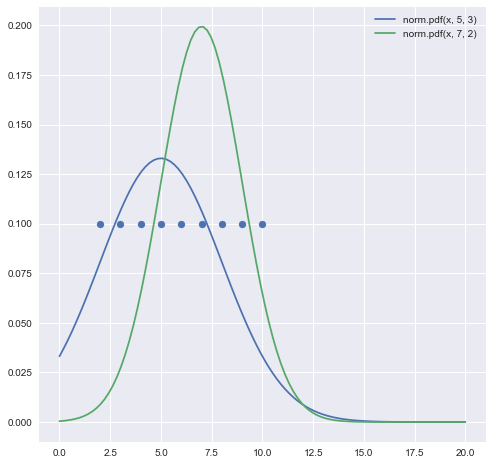

In [104]:
sample = np.linspace(2,10,9)
x=np.linspace(0,20,100)
y=norm.pdf(x, 5, 3)
y1=norm.pdf(x, 7, 2)

sns.set()
plt.figure(figsize=(8,8))
plt.plot(x,y)
plt.plot(x,y1)
plt.scatter(sample,np.zeros(len(sample))+0.1)
plt.legend(['norm.pdf(x, 5, 3)','norm.pdf(x, 7, 2)'],loc='upper right')

Итак, мы хотим найти *p(4, 5, 7, 8, 8, 9, 10, 5, 2, 3, 5, 4, 8, 9; μ, σ)*. Вероятность этих выборок исходит из нормального распределения с **μ** и **σ**. Но мы не знаем **μ** и **σ**, поэтому нам нужно их оценить.

Мы делаем это с помощью оценки максимального правдоподобия (MLE), чтобы указать распределения неизвестных параметров, чтобы вытащить фактические значения параметров.

Наше **θ** является параметром, который оценивает **x** = [4, 5, 7, 8, 8, 9, 10, 5, 2, 3, 5, 4, 8, 9], который, как мы предполагаем, исходит из нормального распределения PDF, показанного ниже.

Мы хотим максимизировать вероятность того, что наш параметр **θ** относится к нормальному распределению. Мы можем назвать это наше уравнение правдоподобия, и когда мы взяв логарифм уравнения уравнения PDF,  мы можем называть его логарифмической вероятностью:

Log Likelihood Equation:
    
![LLE](https://cdn-images-1.medium.com/max/1200/1*H4hW2Haijx9lMdIQJWP32w.png)

In [35]:
# Compare the likelihood of the random samples to the two 
# distributions
def compare_data_to_dist(x, mu_1=5, mu_2=7, sd_1=3, sd_2=3):
    ll_1 = 0
    ll_2 = 0
    for i in x:
        ll_1 += np.log(norm.pdf(i, mu_1, sd_1))
        ll_2 += np.log(norm.pdf(i, mu_2, sd_2))
    
    print ("The LL of of x for mu = %d and sd = %d is: %.4f" % (mu_1, sd_1, ll_1))
    print ("The LL of of x for mu = %d and sd = %d is: %.4f" % (mu_2, sd_2, ll_2))
compare_data_to_dist(sample)

The LL of of x for mu = 5 and sd = 3 is: -33.9679
The LL of of x for mu = 7 and sd = 3 is: -33.3013


Где [-33.3013] - лучшая минимизация. Мы хотим построить логарифмическую вероятность для возможных значений **μ** и **σ**. Ниже мы зафиксировали **σ** при 3,0, а наше предположение для **μ - {μ ∈ R | x ≥ 0 и x ≤ 20}**, и будет построена по оси **x**.

Мы можем видеть, что максимум нашей функции правдоподобия встречается вокруг значения [6.2]. Наша цель - найти значения **μ** и **σ**, которые максимизируют функцию правдоподобия.

Text(0,0.5,'Log Likelihood')

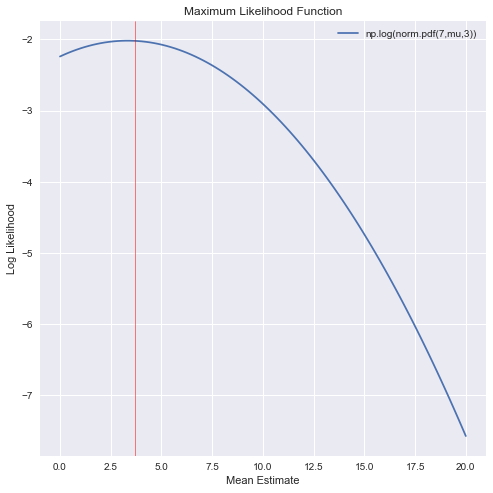

In [103]:
mu=np.linspace(0,20,100)
x=np.linspace(2,10,100)
y=norm.pdf(x,mu,3)# сд зафиксировано и равно 3
plt.figure(figsize=(8,8))
plt.plot(mu,np.log(y))
plt.legend(['np.log(norm.pdf(7,mu,3))'],loc='upper right')
plt.axvline(x=3.7,linewidth=0.5, color='r')
plt.title("Maximum Likelihood Function")
plt.xlabel("Mean Estimate")
plt.ylabel("Log Likelihood")

Теперь мы хотим подставить **θ** в **μ** и **σ** в нашу функции правдоподобия. Назовем их **θ_mu** и **θ_sigma**.

Чтобы максимизировать наше уравнение по каждому из наших параметров, нам нужно взять производную и приравнять к 0.

Сначала давайте оценим **θ_mu** из нашего уравнения правдоподобия, приведенного выше:

![MLE](https://cdn-images-1.medium.com/max/1200/1*LPWYnLEQ6oCfPXFuGT02oA.png)
Производная нашей функции Логарифмического правдоподобия по **θ_mu**.

Видим, что оценка максимального правдоподобия для **θ_mu** является суммой наших наблюдений, деленная на количество наблюдений. И давайте сделаем то же самое для **θ_sigma**:

![MLE](https://cdn-images-1.medium.com/max/1200/1*awqGrmSMxvd_z829mp0LRQ.png)

Производная нашей функции Логарифмического правдоподобия по **θ_sigma**.

The max LL for sd 0.50 is -122.03
The max LL for sd 1.00 is -38.27
The max LL for sd 1.50 is -25.25
The max LL for sd 2.50 is -21.32
The max LL for sd 3.00 is -21.49
The max LL for sd 3.50 is -21.99


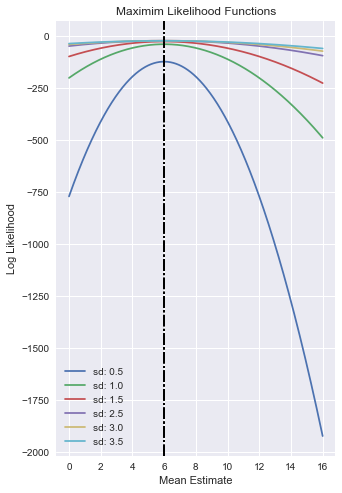

In [92]:
# Plot the Maximum Likelihood Functions for different values of mu and sigma
def plot_ll(x):
    plt.figure(figsize=(5,8))
    plt.title("Maximim Likelihood Functions")
    plt.xlabel("Mean Estimate")
    plt.ylabel("Log Likelihood")
    mu_set = np.linspace(0, 16, 1000)
    sd_set = [.5, 1, 1.5, 2.5, 3, 3.5]
    max_val = max_val_location = None
    for i in sd_set:
        ll_array = []
        
        for j in mu_set:
            temp_mm = 0
            
            for k in x:
                temp_mm += np.log(norm.pdf(k, j, i)) # The LL function
            ll_array.append(temp_mm)
        
            if (max_val is None):
                max_val = max(ll_array)
            elif max(ll_array) > max_val:
                max_val = max(ll_array)
                max_val_location = j
        
        # Plot the results
        plt.plot(mu_set, ll_array, label="sd: %.1f" % i)    
        print ("The max LL for sd %.2f is %.2f" % (i, max(ll_array)))
        plt.axvline(x=max_val_location, color='black', ls='-.')
        plt.legend(loc='lower left')

x=np.linspace(2,10,9)
plot_ll(x)

Каждая строка отображает другую функцию правдоподобия для другого значения **θ_sigma**. Каждый максимум кластеризуется вокруг одной и той же точки **6.2**, как и выше, что наша оценка для **θ_mu**. Теперь мы видим, как меняется наша оценка для изменений **θ_sigma**, функция правдоподобия обеспечивает наше максимальное значение. На приведенном ниже графике это примерно **2.5**.

Проверяем для оценки среднего:

$θ_{mu} = \sum (x) / n = (2 + 3 + 4 + 5 + 6 + 7 + 8 + 9 + 10) / 9 = 6$ 

Для оценки дисперсии:

$θ_{sigma} = \sum (x - θ_{mu})^2 / n = \sum(x - 6)^2 / 8 = 2.582$


In [99]:
# И вот ещё раз с поощью стандартных функций :)
print(np.mean(x))
print(np.std(x))

6.0
2.581988897471611


Теперь, когда у нас есть оценки для mu и сигма нашего распределения - краынй цвет на графике - и посмотрите, как она складывается с потенциальными распределениями, на которые мы смотрели раньше.

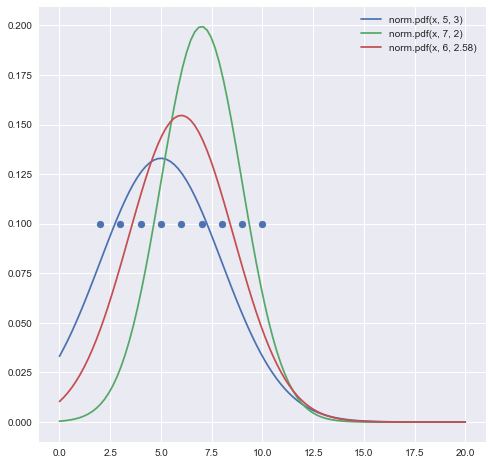

In [107]:
sample = np.linspace(2,10,9)
x=np.linspace(0,20,100)
y=norm.pdf(x, 5, 3)
y1=norm.pdf(x, 7, 2)
y_estimated=norm.pdf(x, 6, 2.58)
plt.figure(figsize=(8,8))
plt.plot(x,y)
plt.plot(x,y1)
plt.plot(x,y_estimated)
plt.scatter(sample,np.zeros(len(sample))+0.1)
plt.legend(['norm.pdf(x, 5, 3)','norm.pdf(x, 7, 2)','norm.pdf(x, 6, 2.58)'],loc='upper right')

# 2. Дельта- метод

##### 1. Источник Casella berger стр 523, пример 10.17 ( заодно там и бутстреп)
https://fsalamri.files.wordpress.com/2015/02/casella_berger_statistical_inference1.pdf

##### 2. Отсюда задача про рыбу  B3
http://www.phidot.org/software/mark/docs/book/pdf/app_2.pdf

##### 3. Просто как работает дельта метод в statsmodels отсюда
https://stats.idre.ucla.edu/r/faq/how-can-i-estimate-the-standard-error-of-transformed-regression-parameters-in-r-using-the-delta-method/3. 

# 3. KL и JL дивергенция

### 1. KL дивергенция:

$KLD(P||Q)=\mathop{\mathbb{E}}x∼P[\log(P(x))Q(x)]=\mathop{\mathbb{E}}x∼P[\log(P(x))−\log(Q(x))]=	\int\limits{x}P(x)(logP(x)−logQ(x))=\sum P(x) \log( \frac{P(x)}{Q(x)}$

### 2. JS дивергенция:

$JSD (P||Q) = \frac{1}{2}KL(P||M) +\frac{1}{2}KL(Q||M) where M= \frac{1}{2}(P+Q)$

##### Пример вот отсюда https://qiita.com/Rowing0914/items/2f3fcb114ae671c7c394

my_KL:  0.00 scipy_KL:  0.00
my_KL:  0.12 scipy_KL:  0.12
my_KL:  0.50 scipy_KL:  0.50
my_KL:  1.12 scipy_KL:  1.12
my_KL:  2.00 scipy_KL:  2.00
my_KL:  3.12 scipy_KL:  3.12
my_KL:  4.50 scipy_KL:  4.50
my_KL:  6.12 scipy_KL:  6.12
my_KL:  8.00 scipy_KL:  8.00


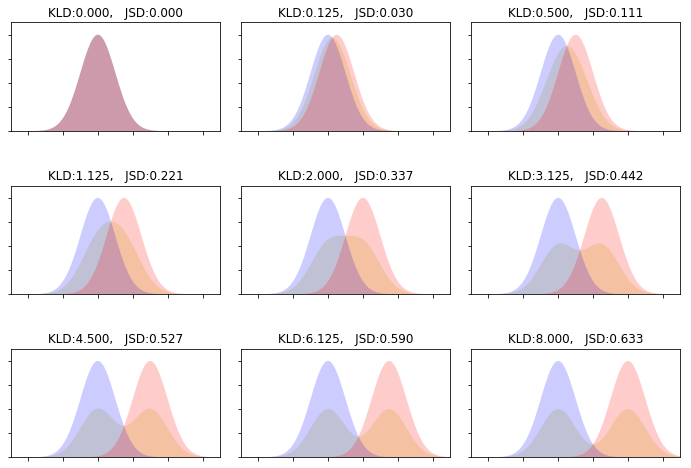

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm, entropy

def entropy_multi(p, q):
  return np.sum(p * np.log(p / q), axis=0)

def entropy_single(p):
  return np.sum(p * np.log(p), axis=0)

def KLD(pk, qk):
  # arraynise
  pk = np.asarray(pk)
  # normalise
  pk = 1.0*pk / np.sum(pk, axis=0)
  # check to decide if we apply single or multi entorpy
  if qk is None:
      return np.sum(entropy_single(pk), axis=0)
  else:
      # arraynise
      qk = np.asarray(qk)
      if len(qk) != len(pk):
          raise ValueError("qk and pk must have same length.")
      qk = 1.0*qk / np.sum(qk, axis=0)
      return np.sum(entropy_multi(pk, qk), axis=0)

# data prep
x = np.linspace(-10.0, 10.0, 1000)

# graph setting
plt.figure(figsize=(12,8))

# gradually shift the distribution
for i in np.arange(3):
    for j in np.arange(3):
        # index to shift
        index = i*3 + j
        # probabilistic distribution function
        p = norm.pdf(x, loc=0, scale=1)
        q = norm.pdf(x, loc=index*0.5, scale=1)
        # mean of them
        m = (p+q)/2
        # scipy entropy
        kl = entropy(p, q)
        kl_mine = KLD(p,q)
        # checker
        print("my_KL: ", "{0:.2f}".format(kl_mine), "scipy_KL: ", "{0:.2f}".format(kl))
        # prep for js divergence
        kl_pm = KLD(p, m)
        kl_qm = KLD(q, m)
        js = (kl_pm + kl_qm)/2
        plt.subplot(3,3,i*3+j+1)
        plt.fill_between(x, m, facecolor="y", alpha=0.2)
        plt.fill_between(x, p, facecolor="b", alpha=0.2)
        plt.fill_between(x, q, facecolor="r", alpha=0.2)
        plt.xlim(-5, 7)
        plt.ylim(0,0.45)
        plt.title("KLD:{:>.3f}".format(kl) + ",   JSD:{:>.3f}".format(js))
        plt.tick_params(labelbottom="off")
        plt.tick_params(labelleft="off")

plt.subplots_adjust(wspace=0.1, hspace=0.5)
plt.show()

# Информация Фишера

##### 1. Пример вот отсюда http://wittman.physics.ucdavis.edu/Fisher-matrix-guide.pdf

In [37]:
xvals = (-1,1)# the list of x positions at which you will measure 
sigmavals = (0.1,0.1) # the list of uncertainties of those measurements
xvals = (-1,1,1)
sigmavals = (0.1,0.1,0.1)
npar = 2

F = np.zeros([npar,npar])
for x,sigma in zip(xvals,sigmavals):
    for i in range(npar):
        if i==0:
            dfdpi = x
        else:
            dfdpi = 1
        for j in range(npar):
            if j==0:
                dfdpj = x
            else:
                dfdpj = 1
                
            F[i,j] += sigma**-2*dfdpi*dfdpj
        
print (np.mat(F).I) # invert the matrix

[[ 0.00375 -0.00125]
 [-0.00125  0.00375]]


##### Статья по теме https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5180148/

##### 2. Пример вот отсюда - тут какой то реальный кейс и много кода который можно адаптировать по астрологии
http://www.stsci.edu/~dcoe/Fisher/

##### 3. Пример вот отсюда, тут просто посчитать матрицу информации Фишера 
library Cosmic Fisher https://cosmicfish.github.io/documentation/CosmicFishPyLib/example.html#://

# 5. Метрика Вассерштейна

##### 1. Громов-Вассерштейн это тоже самое? Если да, то вот

https://pot.readthedocs.io/en/stable/auto_examples/plot_gromov.html
    
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.wasserstein_distance.html

# 6. Optimal transport

##### 1. Вот в этой библиотечке пройтись по парочке туториалов для 1D и 2D
https://pot.readthedocs.io/en/stable/

# * Параметрическая регрессия  (просто так оставила, вдруг пригодится)
##### Источник: https://pythonhosted.org/PyQt-Fit/Param_tut.html

![Не точно](https://memepedia.ru/wp-content/uploads/2017/08/%D0%BD%D0%BE-%D1%8D%D1%82%D0%BE-%D0%BD%D0%B5-%D1%82%D0%BE%D1%87%D0%BD%D0%BE-%D0%B1%D0%B8%D0%B3-%D1%80%D0%B0%D1%88%D0%BD-%D0%B1%D0%BE%D1%81%D1%81-1.jpg)

Text(0,0.5,'Y')

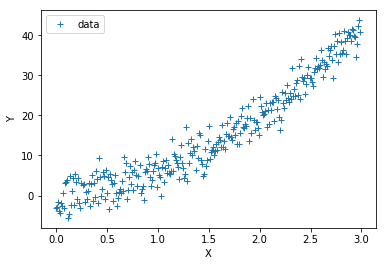

In [3]:
import numpy as np
from matplotlib import pylab as plt
x = np.arange(0,3,0.01)
y = 2*x + 4*x**2 + 3*np.random.randn(*x.shape)
plt.plot(x,y,'+',label='data')
plt.legend(loc=0)
plt.xlabel('X'); plt.ylabel('Y')

# Monte Carlo Estimation
##### Code sourse: http://www-personal.umd.umich.edu/~wiclarks/AstroLab/HOWTOs/NotebookStuff/MonteCarloHOWTO.html